# Data Analysis Examples

The example datasets are found in the book’s accompanying GitHub repository.

http://www.github.com/wesm/pydata-book

In [1]:
import pandas as pd; import numpy as np

In [2]:
%matplotlib inline

## USA.gov Data from Bitly

In 2011, URL shortening service Bitly partnered with the US government website USA.gov to provide a feed of anonymous data gathered from users who shorten links ending with .gov or .mil. 

In 2011, a live feed as well as *hourly snapshots* were available as downloadable text files. 

In the case of the hourly snapshots, **each line in each file contains a JSON**. For example,
if we read just the first line of a file we may see something like this:

In [3]:
path = 'example.txt'

In [4]:
json.loads(open(path).readline())

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'al': 'en-US,en;q=0.8',
 'c': 'US',
 'cy': 'Danvers',
 'g': 'A6qOVH',
 'gr': 'MA',
 'h': 'wfLQtf',
 'hc': 1331822918,
 'hh': '1.usa.gov',
 'l': 'orofrog',
 'll': [42.576698, -70.954903],
 'nk': 1,
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 't': 1331923247,
 'tz': 'America/New_York',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

Python has both **built-in** and **third-party libraries** for converting a JSON string into a
Python dictionary object. Here we’ll use the `json` module and its loads function invoked on each line in the sample file we downloaded:

In [5]:
import json
path = 'example.txt'
records = [json.loads(line) for line in open(path)]

In [6]:
records

[{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
  'al': 'en-US,en;q=0.8',
  'c': 'US',
  'cy': 'Danvers',
  'g': 'A6qOVH',
  'gr': 'MA',
  'h': 'wfLQtf',
  'hc': 1331822918,
  'hh': '1.usa.gov',
  'l': 'orofrog',
  'll': [42.576698, -70.954903],
  'nk': 1,
  'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
  't': 1331923247,
  'tz': 'America/New_York',
  'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991'},
 {'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
  'al': 'en-US,en;q=0.8',
  'c': 'US',
  'cy': 'Danvers',
  'g': 'A6qOVH',
  'gr': 'MA',
  'h': 'wfLQtf',
  'hc': 1331822918,
  'hh': '1.usa.gov',
  'l': 'orofrog',
  'll': [42.576698, -70.954903],
  'nk': 1,
  'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
  't': 1331923247,
  'tz': 'America/New_York',
  'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991'},
 {'a': 'Mozilla/

In [7]:
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'al': 'en-US,en;q=0.8',
 'c': 'US',
 'cy': 'Danvers',
 'g': 'A6qOVH',
 'gr': 'MA',
 'h': 'wfLQtf',
 'hc': 1331822918,
 'hh': '1.usa.gov',
 'l': 'orofrog',
 'll': [42.576698, -70.954903],
 'nk': 1,
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 't': 1331923247,
 'tz': 'America/New_York',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

### Counting Time Zones in Pure Python

Finding the *most often-occurring time zones* in the dataset (the `tz` field). There are many ways we could do this. 

First, let’s extract a list of time zones again using a list comprehension:

In [8]:
## time_zones = [rec['tz'] for rec in records] #ERROR

Turns out that not all of the records have a time zone field. This is easy to handle, as we can add the check if 'tz' in `rec` at the end of the list comprehension:

In [9]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

In [10]:
time_zones[:20]

['America/New_York',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'Iran/Tehran',
 'America/New_York',
 'America/New_York',
 'Iran/Tehran',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 '',
 'America/New_York',
 'Iran/Tehran',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'America/New_York']

Just looking at the first 10 time zones, we see that some of them are *unknown* (empty string). 

You can filter these out also, but I’ll leave them in for now. 

Now, to produce counts by time zone I’ll show two approaches: 

* the harder way (using just the Python standard library) 
* the easier way (using pandas). 


#### Counting Time Zones with Pure Python

One way to do the counting is to use a dict to store counts while we iterate through the time zones:

In [11]:
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

Using more advanced tools in the Python standard library, you can write the same thing more briefly:

In [12]:
from collections import defaultdict
def get_counts2(sequence):
    counts = defaultdict(int) # values will initialize to 0
    for x in sequence:
        counts[x] += 1
    return counts

To use it on the time zones, just pass the `time_zones` list:

In [13]:
counts = get_counts(time_zones)

In [14]:
counts

{'America/New_York': 33, 'Iran/Tehran': 6, '': 1}

In [15]:
counts['America/New_York']

33

In [16]:
len(time_zones)

40

Top 10 time zones and their counts, we can do a bit of dictionary acrobatics:

In [17]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [18]:
top_counts(counts)

[(1, ''), (6, 'Iran/Tehran'), (33, 'America/New_York')]

You may find the `collections.Counter` class, which makes this task a lot easier:

In [19]:
from collections import Counter

In [20]:
counts = Counter(time_zones)

In [21]:
counts

Counter({'America/New_York': 33, 'Iran/Tehran': 6, '': 1})

In [22]:
counts.most_common(10)

[('America/New_York', 33), ('Iran/Tehran', 6), ('', 1)]

#### Counting Time Zones with pandas

In [23]:
frame = pd.DataFrame(records)

In [24]:
frame.head(5)

,a,al,c,cy,g,gr,h,hc,hh,l,ll,nk,r,t,tz,u
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1331822918,1.usa.gov,orofrog,"[42.576698, -70.954903]",1,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1331923247,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1331822918,1.usa.gov,orofrog,"[42.576698, -70.954903]",1,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1331923247,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
2,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1331822918,1.usa.gov,orofrog,"[42.576698, -70.954903]",1,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1331923247,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
3,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1331822918,1.usa.gov,orofrog,"[42.576698, -70.954903]",1,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1331923247,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
4,GoogleMaps/RochesterNY,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1331822918,1.usa.gov,orofrog,"[42.576698, -70.954903]",1,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1331923247,Iran/Tehran,http://www.ncbi.nlm.nih.gov/pubmed/22415991


In [25]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 16 columns):
a     41 non-null object
al    42 non-null object
c     42 non-null object
cy    42 non-null object
g     42 non-null object
gr    42 non-null object
h     42 non-null object
hc    42 non-null int64
hh    42 non-null object
l     42 non-null object
ll    42 non-null object
nk    42 non-null int64
r     42 non-null object
t     42 non-null int64
tz    40 non-null object
u     42 non-null object
dtypes: int64(3), object(13)
memory usage: 5.4+ KB


In [26]:
frame['tz'][:20]

0     America/New_York
1     America/New_York
2     America/New_York
3     America/New_York
4          Iran/Tehran
5     America/New_York
6     America/New_York
7          Iran/Tehran
8     America/New_York
9     America/New_York
10    America/New_York
11                    
12    America/New_York
13         Iran/Tehran
14    America/New_York
15    America/New_York
16    America/New_York
17                 NaN
18    America/New_York
19    America/New_York
Name: tz, dtype: object

In [27]:
tz_counts = frame['tz'].value_counts()

In [28]:
tz_counts[:20]

America/New_York    33
Iran/Tehran          6
                     1
Name: tz, dtype: int64

Visualize this data using matplotlib

You can do a bit of munging to fill in a substitute value for unknown and missing time zone data in the records. We replace the missing values with the `fillna` method and use boolean array indexing for the empty strings

In [29]:
clean_tz = frame['tz'].fillna('Missing')

In [30]:
clean_tz

0     America/New_York
1     America/New_York
2     America/New_York
3     America/New_York
4          Iran/Tehran
5     America/New_York
6     America/New_York
7          Iran/Tehran
8     America/New_York
9     America/New_York
10    America/New_York
11                    
12    America/New_York
13         Iran/Tehran
14    America/New_York
15    America/New_York
16    America/New_York
17             Missing
18    America/New_York
19    America/New_York
20    America/New_York
21    America/New_York
22    America/New_York
23             Missing
24    America/New_York
25    America/New_York
26    America/New_York
27    America/New_York
28         Iran/Tehran
29    America/New_York
30    America/New_York
31    America/New_York
32    America/New_York
33         Iran/Tehran
34    America/New_York
35    America/New_York
36    America/New_York
37         Iran/Tehran
38    America/New_York
39    America/New_York
40    America/New_York
41    America/New_York
Name: tz, dtype: object

In [31]:
clean_tz[clean_tz == ''] = 'Unknown'

In [32]:
clean_tz

0     America/New_York
1     America/New_York
2     America/New_York
3     America/New_York
4          Iran/Tehran
5     America/New_York
6     America/New_York
7          Iran/Tehran
8     America/New_York
9     America/New_York
10    America/New_York
11             Unknown
12    America/New_York
13         Iran/Tehran
14    America/New_York
15    America/New_York
16    America/New_York
17             Missing
18    America/New_York
19    America/New_York
20    America/New_York
21    America/New_York
22    America/New_York
23             Missing
24    America/New_York
25    America/New_York
26    America/New_York
27    America/New_York
28         Iran/Tehran
29    America/New_York
30    America/New_York
31    America/New_York
32    America/New_York
33         Iran/Tehran
34    America/New_York
35    America/New_York
36    America/New_York
37         Iran/Tehran
38    America/New_York
39    America/New_York
40    America/New_York
41    America/New_York
Name: tz, dtype: object

In [33]:
tz_counts = clean_tz.value_counts()

In [34]:
tz_counts

America/New_York    33
Iran/Tehran          6
Missing              2
Unknown              1
Name: tz, dtype: int64

In [35]:
import seaborn as sns

In [36]:
subset = tz_counts[:10]

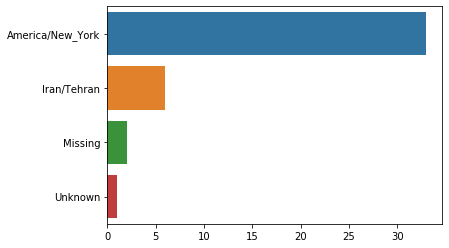

In [37]:
sns.barplot(y=subset.index, x=subset.values)

The a field contains information about the browser, device, or application used to perform the URL shortening:

In [38]:
frame['a'][1]

'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11'

In [39]:
frame['a'][20]

'GoogleMaps/RochesterNY'

In [40]:
frame['a'][10][:50] # long line

'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/53'

Parsing all of the interesting information in these “agent” strings may seem like a daunting task. 
One possible strategy is to *split off the first token in the string* (corresponding roughly to the browser capability) and make another summary of the user behavior:

In [41]:
results = pd.Series([x.split()[0] for x in frame['a'].dropna()])

In [42]:
results

0                Mozilla/5.0
1                Mozilla/5.0
2                Mozilla/5.0
3                Mozilla/5.0
4     GoogleMaps/RochesterNY
5                Mozilla/5.0
6                Mozilla/5.0
7                Mozilla/5.0
8     GoogleMaps/RochesterNY
9                Mozilla/5.0
10               Mozilla/5.0
11               Mozilla/5.0
12               Mozilla/5.0
13               Mozilla/5.0
14    GoogleMaps/RochesterNY
15               Mozilla/5.0
16               Mozilla/5.0
17               Mozilla/5.0
18               Mozilla/5.0
19               Mozilla/5.0
20    GoogleMaps/RochesterNY
21               Mozilla/5.0
22               Mozilla/5.0
23               Mozilla/5.0
24    GoogleMaps/RochesterNY
25    GoogleMaps/RochesterNY
26               Mozilla/5.0
27               Mozilla/5.0
28               Mozilla/5.0
29               Mozilla/5.0
30               Mozilla/5.0
31               Mozilla/5.0
32    GoogleMaps/RochesterNY
33               Mozilla/5.0
34            

In [43]:
results.value_counts()[:8]

Mozilla/5.0               33
GoogleMaps/RochesterNY     8
dtype: int64

Suppose you wanted to *decompose the top time zones into Windows and nonWindows users*. 

As a simplification, let’s say that a user is on Windows if the string "Windows" is in the agent string. Since some of the agents are missing, we’ll exclude these from the data:

In [44]:
cframe = frame[frame['a'].notnull()]

In [45]:
cframe

,a,al,c,cy,g,gr,h,hc,hh,l,ll,nk,r,t,tz,u
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1331822918,1.usa.gov,orofrog,"[42.576698, -70.954903]",1,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1331923247,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1331822918,1.usa.gov,orofrog,"[42.576698, -70.954903]",1,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1331923247,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
2,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1331822918,1.usa.gov,orofrog,"[42.576698, -70.954903]",1,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1331923247,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
3,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1331822918,1.usa.gov,orofrog,"[42.576698, -70.954903]",1,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1331923247,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
4,GoogleMaps/RochesterNY,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1331822918,1.usa.gov,orofrog,"[42.576698, -70.954903]",1,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1331923247,Iran/Tehran,http://www.ncbi.nlm.nih.gov/pubmed/22415991
5,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1331822918,1.usa.gov,orofrog,"[42.576698, -70.954903]",1,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1331923247,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
6,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1331822918,1.usa.gov,orofrog,"[42.576698, -70.954903]",1,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1331923247,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
7,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1331822918,1.usa.gov,orofrog,"[42.576698, -70.954903]",1,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1331923247,Iran/Tehran,http://www.ncbi.nlm.nih.gov/pubmed/22415991
8,GoogleMaps/RochesterNY,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1331822918,1.usa.gov,orofrog,"[42.576698, -70.954903]",1,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1331923247,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
9,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1331822918,1.usa.gov,orofrog,"[42.576698, -70.954903]",1,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1331923247,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991


We want to then compute a new column for whether each row is Windows or not:

In [46]:
cframe['os'] = np.where(cframe['a'].str.contains('Windows'), 'Windows', 'Not Windows')

D:\Anaconda3\envs\cv_course\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
cframe['os']

0         Windows
1         Windows
2         Windows
3         Windows
4     Not Windows
5         Windows
6         Windows
7         Windows
8     Not Windows
9         Windows
10        Windows
11        Windows
12        Windows
13        Windows
14    Not Windows
15        Windows
16        Windows
17        Windows
18        Windows
19        Windows
20    Not Windows
21        Windows
22        Windows
23        Windows
24    Not Windows
25    Not Windows
26        Windows
27        Windows
29        Windows
30        Windows
31        Windows
32        Windows
33    Not Windows
34        Windows
35        Windows
36    Not Windows
37        Windows
38        Windows
39        Windows
40        Windows
41        Windows
Name: os, dtype: object

Then, you can group the data by its time zone column and this new list of operating
systems:

In [48]:
by_tz_os = cframe.groupby(['tz', 'os'])

In [49]:
by_tz_os

The group counts, analogous to the `value_counts` function, can be computed with size. This result is then reshaped into a table with `unstack`:

In [50]:
agg_counts = by_tz_os.size()

In [51]:
agg_counts

tz                os         
                  Windows         1
America/New_York  Not Windows     6
                  Windows        27
Iran/Tehran       Not Windows     2
                  Windows         3
dtype: int64

In [52]:
agg_counts = by_tz_os.size().unstack()

In [53]:
agg_counts

os,Not Windows,Windows
tz,,
,NaN,1.0
America/New_York,6.0,27.0
Iran/Tehran,2.0,3.0


In [54]:
agg_counts = by_tz_os.size().unstack().fillna(0)

In [55]:
agg_counts

os,Not Windows,Windows
tz,,
,0.0,1.0
America/New_York,6.0,27.0
Iran/Tehran,2.0,3.0


Finally, let’s select the top overall time zones. To do so, I construct an indirect index array from the row counts in `agg_counts`:

In [56]:
indexer = agg_counts.sum(1)

In [57]:
indexer

tz
                     1.0
America/New_York    33.0
Iran/Tehran          5.0
dtype: float64

In [58]:
indexer = agg_counts.sum(1).argsort()

In [59]:
indexer

tz
                    0
America/New_York    2
Iran/Tehran         1
dtype: int64

I use `take` to select the rows in that order, then slice off the last 10 rows (largest values):

In [60]:
count_subset = agg_counts.take(indexer[-10:])

In [61]:
count_subset  

os,Not Windows,Windows
tz,,
,0.0,1.0
Iran/Tehran,2.0,3.0
America/New_York,6.0,27.0


pandas has a convenience method called `nlargest` that does the same thing:

In [62]:
agg_counts.sum(1).nlargest(10)

tz
America/New_York    33.0
Iran/Tehran          5.0
                     1.0
dtype: float64

I’ll make it a stacked bar plot by passing an additional argument to seaborn’s `barplot` function;

In [63]:
# Rearrange the data for plotting
count_subset = count_subset.stack()

In [64]:
count_subset

tz                os         
                  Not Windows     0.0
                  Windows         1.0
Iran/Tehran       Not Windows     2.0
                  Windows         3.0
America/New_York  Not Windows     6.0
                  Windows        27.0
dtype: float64

In [65]:
count_subset.name = 'total'

In [66]:
count_subset

tz                os         
                  Not Windows     0.0
                  Windows         1.0
Iran/Tehran       Not Windows     2.0
                  Windows         3.0
America/New_York  Not Windows     6.0
                  Windows        27.0
Name: total, dtype: float64

In [67]:
count_subset = count_subset.reset_index()

In [68]:
count_subset

,tz,os,total
0,,Not Windows,0.0
1,,Windows,1.0
2,Iran/Tehran,Not Windows,2.0
3,Iran/Tehran,Windows,3.0
4,America/New_York,Not Windows,6.0
5,America/New_York,Windows,27.0


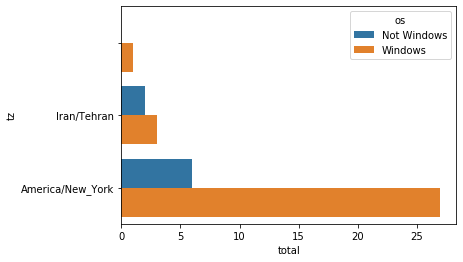

In [69]:
sns.barplot(x='total', y='tz', hue='os', data=count_subset)

The plot doesn’t make it easy to see the relative percentage of Windows users in the smaller groups, so let’s *normalize the group percentages to sum to 1*:

In [70]:
def norm_total(group):
    group['normed_total'] = group['total'] / group['total'].sum()
    return group

In [71]:
count_subset

,tz,os,total
0,,Not Windows,0.0
1,,Windows,1.0
2,Iran/Tehran,Not Windows,2.0
3,Iran/Tehran,Windows,3.0
4,America/New_York,Not Windows,6.0
5,America/New_York,Windows,27.0


In [72]:
count_subset.groupby('tz').sum()

,total
tz,
,1.0
America/New_York,33.0
Iran/Tehran,5.0


In [73]:
count_subset.groupby('tz')['total']

In [74]:
results = count_subset.groupby('tz').apply(norm_total)

In [75]:
results

,tz,os,total,normed_total
0,,Not Windows,0.0,0.000000
1,,Windows,1.0,1.000000
2,Iran/Tehran,Not Windows,2.0,0.400000
3,Iran/Tehran,Windows,3.0,0.600000
4,America/New_York,Not Windows,6.0,0.181818
5,America/New_York,Windows,27.0,0.818182


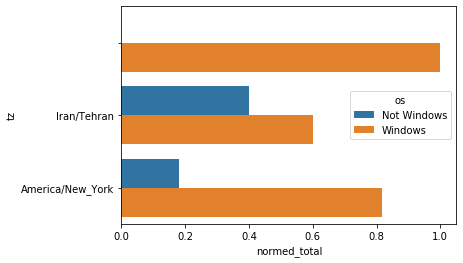

In [76]:
sns.barplot(x='normed_total', y='tz', hue='os', data=results)

We could have computed the normalized sum more efficiently by using the `transform` method with `groupby`:

In [77]:
g = count_subset.groupby('tz')

In [78]:
results2 = count_subset.total / g.total.transform('sum')

In [79]:
results2

0    0.000000
1    1.000000
2    0.400000
3    0.600000
4    0.181818
5    0.818182
Name: total, dtype: float64

## 14.2 MovieLens 1M Dataset

a number of collections of movie ratings data collected from users of MovieLens in the late 1990s and early 2000s. 

The data provide movie ratings, movie metadata (genres and year), and demographic data about the users `(age, zip code, gender identification, and occupation)`. 

The MovieLens 1M dataset contains 1 million ratings collected from 6,000 users on 4,000 movies. It’s spread across three tables: ratings, user information, and movie information. After extracting the data from the ZIP file, we can load each table into a pandas DataFrame object using `pandas.read_table`:

In [80]:
# Make display smaller
pd.options.display.max_rows = 10

In [81]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('users.dat', sep='::', header=None, names=unames)

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ratings.dat', sep='::', header=None, names=rnames)

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('movies.dat', sep='::', header=None, names=mnames)

D:\Anaconda3\envs\cv_course\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
D:\Anaconda3\envs\cv_course\lib\site-packages\ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """
D:\Anaconda3\envs\cv_course\lib\site-packages\ipykernel_launcher.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [82]:
users.head(5)

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,2460
4,5,M,25,20,55455


In [83]:
movies.head(5)

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Childrens|Comedy
1,2,Jumanji (1995),Adventure|Childrens|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [84]:
ratings.head(5)

,user_id,movie_id,rating,timestamp
1,1,1,5,978300760
2,1,2,3,978302109
1,1,1,3,978301968
2,1,2,4,978300275
2,2,1,5,978824291


In [85]:
data = pd.merge(pd.merge(ratings, users), movies)

In [86]:
ratings.columns, users.columns, movies.columns

(Index(['user_id', 'movie_id', 'rating', 'timestamp'], dtype='object'),
 Index(['user_id', 'gender', 'age', 'occupation', 'zip'], dtype='object'),
 Index(['movie_id', 'title', 'genres'], dtype='object'))

In [87]:
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1,5,978300760,F,1,10,48067,Toy Story (1995),Animation|Childrens|Comedy
1,1,1,3,978301968,F,1,10,48067,Toy Story (1995),Animation|Childrens|Comedy
2,1,1,5,978300760,F,1,10,48067,Toy Story (1995),Animation|Childrens|Comedy
3,1,1,5,978300760,F,1,10,48067,Toy Story (1995),Animation|Childrens|Comedy
4,2,1,5,978824291,M,56,16,70072,Toy Story (1995),Animation|Childrens|Comedy
...,...,...,...,...,...,...,...,...,...,...
13,1,2,3,978302109,F,1,10,48067,Jumanji (1995),Adventure|Childrens|Fantasy
14,1,2,3,978301968,F,1,10,48067,Jumanji (1995),Adventure|Childrens|Fantasy
15,1,2,4,978300275,F,1,10,48067,Jumanji (1995),Adventure|Childrens|Fantasy
16,2,2,5,978824291,M,56,16,70072,Jumanji (1995),Adventure|Childrens|Fantasy


mean movie ratings for each film grouped by gender:

In [88]:
mean_ratings = data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')

In [89]:
mean_ratings

gender,F,M
title,,
Jumanji (1995),3.375,5.0
Toy Story (1995),4.500,5.0


filter down to movies that received at least 250 ratings (a completely arbitrary number); to do this, I then group the data by title and use `size()` to get a Series of group sizes for each title:

In [90]:
ratings_by_title = data.groupby('title').size()

In [91]:
ratings_by_title

title
Jumanji (1995)      10
Toy Story (1995)     8
dtype: int64

In [92]:
active_titles = ratings_by_title.index[ratings_by_title > 8]

In [93]:
active_titles

Index(['Jumanji (1995)'], dtype='object', name='title')

The index of titles receiving at least 250 ratings can then be used to select rows from
`mean_ratings`:

In [94]:
mean_ratings = mean_ratings.loc[active_titles]

In [95]:
mean_ratings

gender,F,M
title,,
Jumanji (1995),3.375,5.0


To see the top films among female viewers, we can sort by the `F` column in descending order:

In [96]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)

In [97]:
top_female_ratings

gender,F,M
title,,
Jumanji (1995),3.375,5.0


### Measuring Rating Disagreement

Find the movies that are most divisive between male and female viewers. One way is to add a column to `mean_ratings` containing the difference in means, then sort by that:

In [98]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

Sorting by `diff` yields the movies with the greatest rating difference so that we can see which ones were preferred by women:

In [99]:
sorted_by_diff = mean_ratings.sort_values(by='diff')

In [100]:
sorted_by_diff

gender,F,M,diff
title,,,
Jumanji (1995),3.375,5.0,1.625


Reversing the order of the rows and again slicing off the top 10 rows, we get the movies preferred by men that women didn’t rate as highly:

In [101]:
sorted_by_diff[::-1][:10]

gender,F,M,diff
title,,,
Jumanji (1995),3.375,5.0,1.625


movies that elicited the most disagreement among viewers, independent of gender identification. Disagreement can be measured by the variance or standard deviation of the ratings:

In [102]:
# Standard deviation of rating grouped by title
rating_std_by_title = data.groupby('title')['rating'].std()

In [103]:
rating_std_by_title

title
Jumanji (1995)      0.823273
Toy Story (1995)    0.707107
Name: rating, dtype: float64

In [104]:
# Filter down to active_titles
rating_std_by_title = rating_std_by_title.loc[active_titles]

In [105]:
# Order Series by value in descending order
rating_std_by_title.sort_values(ascending=False)[:10]

title
Jumanji (1995)    0.823273
Name: rating, dtype: float64

### US Baby Names 1880–2010

The United States Social Security Administration (SSA) has made available data on the **frequency of baby names** from 1880 through the present.

There are many things you might want to do with the dataset:
* Visualize the proportion of babies given a particular name (your own, or another name) over time
* Determine the relative rank of a name
* Determine the most popular names in each year or the names whose popularity has advanced or declined the most
* Analyze trends in names: vowels, consonants, length, overall diversity, changes in spelling, first and last letters
* Analyze external sources of trends: biblical names, celebrities, demographic changes

 http://www.ssa.gov/oact/babynames/limits.html.

In [106]:
# data for year 1880
names1880 = pd.read_csv('yob1880.txt', names=['name', 'sex', 'births'])

In [107]:
names1880.head()

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


These files only **contain names with at least five occurrences in each year**, so for simplicity’s sake we can use the sum of the births column by sex as the total number of births in that year:

In [108]:
names1880.groupby('sex').births.sum()

sex
F    39364
M    25315
Name: births, dtype: int64

Since the dataset is split into files by year, one of the first things to do is to *assemble all of the data into a single DataFrame and further to add a year field*. You can do this using `pandas.concat`:

In [109]:
# years = range(1880, 2011)
years = range(1880, 1885)

pieces = []
columns = ['name', 'sex', 'births']

In [110]:
for year in years:
    path = 'yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    
    frame['year'] = year
    pieces.append(frame)

# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)

In [111]:
names.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


* `concat` glues the DataFrame objects together row-wise by default. 

* You have to pass `ignore_index=True` because we’re not interested in preserving the original row numbers returned from `read_csv`. 

We can already start aggregating the data at the year and sex level using `groupby` or `pivot_table`

In [112]:
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)

In [113]:
total_births

sex,F,M
year,,
1880,39364,25315
1881,39364,25315
1882,39364,25315
1883,39364,25315
1884,34800,24787


In [114]:
total_births.tail()

sex,F,M
year,,
1880,39364,25315
1881,39364,25315
1882,39364,25315
1883,39364,25315
1884,34800,24787


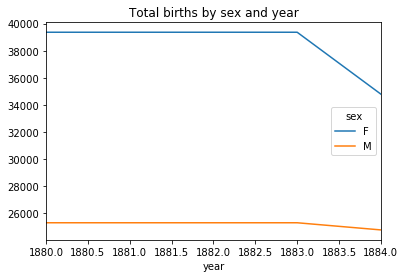

In [115]:
total_births.plot(title='Total births by sex and year')

insert a column `prop` with the **fraction of babies given each name relative to the total number of births**. 

A `prop` value of 0.02 would indicate that 2 out of every 100 babies were given a particular name. 

Thus, we group the data by year and sex, then add the new column to each group:

In [116]:
names.groupby(['year', 'sex']).sum()

births
year sex        
1880 F     39364
     M     25315
1881 F     39364
     M     25315
1882 F     39364
     M     25315
1883 F     39364
     M     25315
1884 F     34800
     M     24787

In [117]:
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group

names = names.groupby(['year', 'sex']).apply(add_prop)

In [118]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.179479
1,Anna,F,2604,1880,0.066152
2,Emma,F,2003,1880,0.050884
3,Elizabeth,F,1939,1880,0.049258
4,Minnie,F,1746,1880,0.044355
...,...,...,...,...,...
135,John,M,1939,1884,0.078226
136,Artin,M,1746,1884,0.070440
137,Moein,M,1578,1884,0.063662
138,Sajjad,M,1472,1884,0.059386


When performing a group operation like this, it’s often valuable to do a sanity check, like verifying that the prop column sums to 1 within all the groups:

In [119]:
names.groupby(['year', 'sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
      M      1.0
1883  F      1.0
      M      1.0
1884  F      1.0
      M      1.0
Name: prop, dtype: float64

The top 1,000 names for each sex/year combination: 

In [120]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]

In [121]:
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)

In [122]:
# Drop the group index, not needed
top1000.reset_index(inplace=True, drop=True)

In [123]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.179479
1,Sahel,F,7065,1880,0.179479
2,Anna,F,2604,1880,0.066152
3,Sima,F,2604,1880,0.066152
4,Emma,F,2003,1880,0.050884
...,...,...,...,...,...
135,Sajjad,M,1472,1884,0.059386
136,Hassan,M,1414,1884,0.057046
137,Mehdi,M,1414,1884,0.057046
138,Saeed,M,1288,1884,0.051963


In [124]:
for year, group in names.groupby(['year', 'sex']):
    print(year)

(1880, 'F')
(1880, 'M')
(1881, 'F')
(1881, 'M')
(1882, 'F')
(1882, 'M')
(1883, 'F')
(1883, 'M')
(1884, 'F')
(1884, 'M')


If you prefer a do-it-yourself approach, try this instead:

In [125]:
pieces = []
for year, group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_values(by='births', ascending=False)[:1000])
top1000 = pd.concat(pieces, ignore_index=True)

In [126]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.179479
1,Sahel,F,7065,1880,0.179479
2,Anna,F,2604,1880,0.066152
3,Sima,F,2604,1880,0.066152
4,Emma,F,2003,1880,0.050884
...,...,...,...,...,...
135,Sajjad,M,1472,1884,0.059386
136,Hassan,M,1414,1884,0.057046
137,Mehdi,M,1414,1884,0.057046
138,Saeed,M,1288,1884,0.051963


Use this Top 1,000 dataset in the following investigations into the data.

### Analyzing Naming Trends

Splitting the Top 1,000 names into the boy and girl portions is easy to do first:

In [127]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

Simple time series, like the number of Johns or Marys for each year, can be plotted but require a bit of munging to be more useful. Let’s form a pivot table of the total number of births by year and name:

In [128]:
total_births = top1000.pivot_table('births', index='year', columns='name', aggfunc=sum)

In [129]:
total_births

name,Ali,Alice,Amir,Anna,Araz,Arezoo,Artin,Asghar,Bertha,Elizabeth,...,Mehdi,Minnie,Moein,Mona,Saeed,Sahel,Sajjad,Sarah,Sima,Zahra
year,,,,,,,,,,,,,,,,,,,,,
1880,1472,1414,2604,2604,7065,2003,1746,2003,1320,1939,...,1414,1746,1578,1939,1288,7065,1472,1288,2604,1578
1881,1472,1414,2604,2604,7065,2003,1746,2003,1320,1939,...,1414,1746,1578,1939,1288,7065,1472,1288,2604,1578
1882,1472,1414,2604,2604,7065,2003,1746,2003,1320,1939,...,1414,1746,1578,1939,1288,7065,1472,1288,2604,1578
1883,1472,1414,2604,2604,7065,2003,1746,2003,1320,1939,...,1414,1746,1578,1939,1288,7065,1472,1288,2604,1578
1884,3574,4342,2604,2604,1214,4241,1746,2003,1320,1214,...,1414,1341,1578,1939,1288,4271,1472,1288,2604,1211


This can be plotted for a handful of names with DataFrame’s plot method:

In [130]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 1880 to 1884
Data columns (total 28 columns):
Ali          5 non-null int64
Alice        5 non-null int64
Amir         5 non-null int64
Anna         5 non-null int64
Araz         5 non-null int64
Arezoo       5 non-null int64
Artin        5 non-null int64
Asghar       5 non-null int64
Bertha       5 non-null int64
Elizabeth    5 non-null int64
Emma         5 non-null int64
Fateme       5 non-null int64
Hassan       5 non-null int64
Hosein       5 non-null int64
Ida          5 non-null int64
John         5 non-null int64
Margaret     5 non-null int64
Mary         5 non-null int64
Mehdi        5 non-null int64
Minnie       5 non-null int64
Moein        5 non-null int64
Mona         5 non-null int64
Saeed        5 non-null int64
Sahel        5 non-null int64
Sajjad       5 non-null int64
Sarah        5 non-null int64
Sima         5 non-null int64
Zahra        5 non-null int64
dtypes: int64(28)
memory usage: 1.1 KB


In [131]:
subset = total_births[['Ali', 'Mona', 'Saeed', 'Emma']]

In [132]:
subset

name,Ali,Mona,Saeed,Emma
year,,,,
1880,1472,1939,1288,2003
1881,1472,1939,1288,2003
1882,1472,1939,1288,2003
1883,1472,1939,1288,2003
1884,3574,1939,1288,253


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002768E1B7CC8>,
      dtype=object)

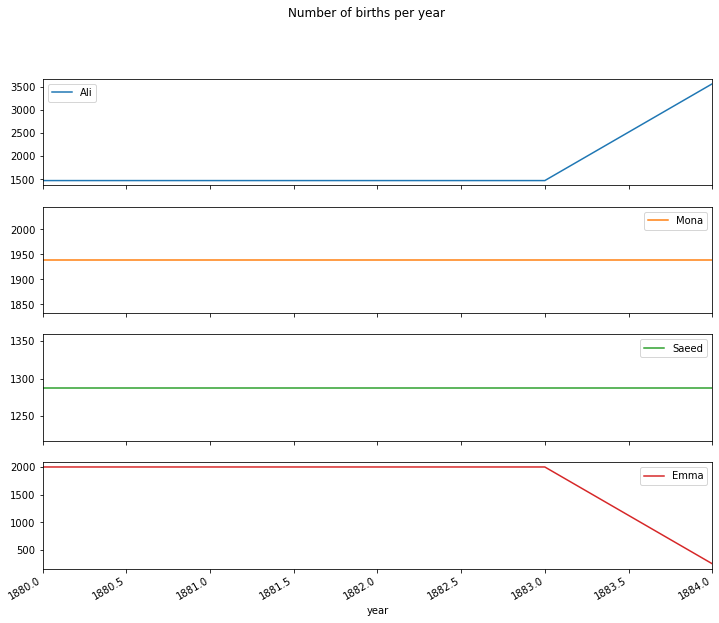

In [133]:
subset.plot(subplots=True, figsize=(12, 10), grid=False, title="Number of births per year")

### Measuring the increase in naming diversity

One explanation for the decrease in plots is that **fewer parents are choosing common names for their children**. This hypothesis can be explored and confirmed in the data.

One measure is **the proportion of births represented by the top 1,000 most popular names**, which I aggregate and plot by year and sex.

In [134]:
table = top1000.pivot_table('prop', index='year', columns='sex', aggfunc=sum)

In [135]:
table

sex,F,M
year,,
1880,1.0,1.0
1881,1.0,1.0
1882,1.0,1.0
1883,1.0,1.0
1884,1.0,1.0


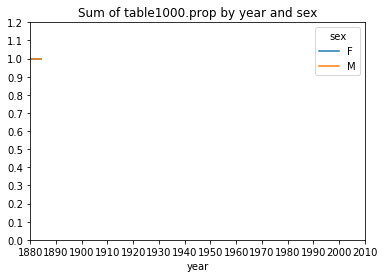

In [136]:
table.plot(title='Sum of table1000.prop by year and sex',
yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

You can see that, indeed, there appears to be increasing name diversity (decreasing total proportion in the top 1,000). 

Another interesting metric is *the number of distinct names*, taken in order of popularity from highest to lowest, in the top 50% of births. This number is a bit more tricky to compute. Let’s consider just the boy names from 2010:

In [137]:
df = boys[boys.year == 1882]

In [138]:
df

,name,sex,births,year,prop
72,Araz,M,7065,1882,0.279084
73,Amir,M,2604,1882,0.102864
74,Asghar,M,2003,1882,0.079123
75,John,M,1939,1882,0.076595
76,Artin,M,1746,1882,0.068971
...,...,...,...,...,...
79,Sajjad,M,1472,1882,0.058147
80,Hassan,M,1414,1882,0.055856
81,Mehdi,M,1414,1882,0.055856
82,Hosein,M,1320,1882,0.052143


After sorting `prop` in descending order, we want to know *how many of the most popular names it takes to reach 50%*. You could write a for loop to do this, but a vectorized NumPy way is a bit more clever. 

Taking the cumulative sum, `cumsum`, of `prop` and then calling the method `searchsorted` returns the position in the cumulative sum at which 0.5 would need to be inserted to keep it in sorted order:

In [139]:
df.sort_values(by='prop', ascending=False)

,name,sex,births,year,prop
72,Araz,M,7065,1882,0.279084
73,Amir,M,2604,1882,0.102864
74,Asghar,M,2003,1882,0.079123
75,John,M,1939,1882,0.076595
76,Artin,M,1746,1882,0.068971
...,...,...,...,...,...
79,Sajjad,M,1472,1882,0.058147
80,Hassan,M,1414,1882,0.055856
81,Mehdi,M,1414,1882,0.055856
82,Hosein,M,1320,1882,0.052143


In [140]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()

In [141]:
prop_cumsum[:10]

72    0.279084
73    0.381947
74    0.461071
75    0.537665
76    0.606636
77    0.668971
78    0.727118
79    0.785266
80    0.841122
81    0.896978
Name: prop, dtype: float64

In [142]:
prop_cumsum.values.searchsorted(0.5)

3

Since arrays are zero-indexed, adding 1 to this result gives you a result of 117. By contrast, in 1900 this number was much smaller:

In [143]:
# df = boys[boys.year == 1900]
df = boys[boys.year == 1884]

In [144]:
df

,name,sex,births,year,prop
128,Hosein,M,4541,1884,0.183201
129,Ali,M,3574,1884,0.144188
130,Amir,M,2604,1884,0.105055
131,Asghar,M,2003,1884,0.080808
132,John,M,1939,1884,0.078226
...,...,...,...,...,...
135,Sajjad,M,1472,1884,0.059386
136,Hassan,M,1414,1884,0.057046
137,Mehdi,M,1414,1884,0.057046
138,Saeed,M,1288,1884,0.051963


In [145]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()

In [146]:
prop_cumsum

128    0.183201
129    0.327389
130    0.432444
131    0.513253
132    0.591479
         ...   
135    0.784968
136    0.842014
137    0.899060
138    0.951023
139    1.000000
Name: prop, Length: 12, dtype: float64

In [147]:
prop_cumsum.values.searchsorted(0.5)

3

In [148]:
in1900 = df.sort_values(by='prop', ascending=False).prop.cumsum()

In [149]:
in1900.values.searchsorted(0.5) + 1

4

You can now apply this operation to each year/sex combination, groupby those fields, and `apply` a function returning the count for each group:

In [150]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1

In [151]:
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)

In [152]:
diversity = diversity.unstack('sex')

In [153]:
diversity

sex,F,M
year,,
1880,5,4
1881,5,4
1882,5,4
1883,5,4
1884,5,4


This resulting DataFrame diversity now has two time series, one for each sex, indexed by year. This can be inspected in IPython and plotted as before

In [154]:
diversity.head()

sex,F,M
year,,
1880,5,4
1881,5,4
1882,5,4
1883,5,4
1884,5,4


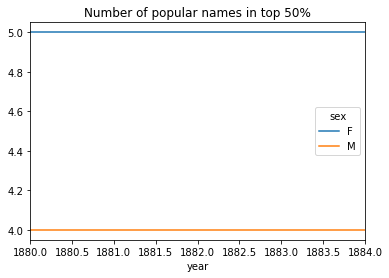

In [155]:
diversity.plot(title="Number of popular names in top 50%")

As you can see, girl names have always been more diverse than boy names, and they have only become more so over time. Further analysis of what exactly is driving the diversity, like the increase of alternative spellings, is left to the reader.

### The “last letter” revolution

In 2007, baby name researcher Laura Wattenberg pointed out on her website that the *distribution of boy names by final letter has changed significantly over the last 100 years*. To see this, we first aggregate all of the births in the full dataset by year, sex, and final letter:

In [156]:
get_last_letter = lambda x: x[-1]

last_letters = names.name.map(get_last_letter)

last_letters.name = 'last_letter'

table = names.pivot_table('births', index=last_letters, columns=['sex', 'year'], aggfunc=sum)

In [157]:
table

sex                F                                           M          \
year            1880     1881     1882     1883     1884    1880    1881   
last_letter                                                                
a            13520.0  13520.0  13520.0  13520.0  11403.0     NaN     NaN   
d                NaN      NaN      NaN      NaN      NaN  2760.0  2760.0   
e             4906.0   4906.0   4906.0   4906.0   8134.0     NaN     NaN   
h             3227.0   3227.0   3227.0   3227.0   2502.0     NaN     NaN   
i                NaN      NaN      NaN      NaN      NaN  2886.0  2886.0   
...              ...      ...      ...      ...      ...     ...     ...   
o             2003.0   2003.0   2003.0   2003.0   4241.0     NaN     NaN   
r                NaN      NaN      NaN      NaN      NaN  4607.0  4607.0   
t             1578.0   1578.0   1578.0   1578.0   1578.0     NaN     NaN   
y             7065.0   7065.0   7065.0   7065.0   2671.0     NaN     NaN   
z                NaN      NaN      NaN      NaN      NaN  7065.0  7065.0   

sex                                  
year           1882    1883    1884  
last_letter                          
a               NaN     NaN     NaN  
d            2760.0  2760.0  2760.0  
e               NaN     NaN     NaN  
h               NaN     NaN     NaN  
i            2886.0  2886.0  4988.0  
...             ...     ...     ...  
o               NaN     NaN     NaN  
r            4607.0  4607.0  4607.0  
t               NaN     NaN     NaN  
y               NaN     NaN     NaN  
z            7065.0  7065.0  1214.0  

[12 rows x 10 columns]

We select out three representative years spanning the history and print the first few rows:

In [158]:
# subtable = table.reindex(columns=[1910, 1960, 2010], level='year')
subtable = table.reindex(columns=[1880, 1881, 1883], level='year')

In [159]:
subtable.head()

sex                F                         M                
year            1880     1881     1883    1880    1881    1883
last_letter                                                   
a            13520.0  13520.0  13520.0     NaN     NaN     NaN
d                NaN      NaN      NaN  2760.0  2760.0  2760.0
e             4906.0   4906.0   4906.0     NaN     NaN     NaN
h             3227.0   3227.0   3227.0     NaN     NaN     NaN
i                NaN      NaN      NaN  2886.0  2886.0  2886.0

Normalize the table by total births to compute a new table containing proportion of total births for each sex ending in each letter:

In [160]:
subtable.sum()

sex  year
F    1880    39364.0
     1881    39364.0
     1883    39364.0
M    1880    25315.0
     1881    25315.0
     1883    25315.0
dtype: float64

In [161]:
letter_prop = subtable / subtable.sum()

In [162]:
letter_prop

sex                 F                             M                    
year             1880      1881      1883      1880      1881      1883
last_letter                                                            
a            0.343461  0.343461  0.343461       NaN       NaN       NaN
d                 NaN       NaN       NaN  0.109026  0.109026  0.109026
e            0.124632  0.124632  0.124632       NaN       NaN       NaN
h            0.081978  0.081978  0.081978       NaN       NaN       NaN
i                 NaN       NaN       NaN  0.114004  0.114004  0.114004
...               ...       ...       ...       ...       ...       ...
o            0.050884  0.050884  0.050884       NaN       NaN       NaN
r                 NaN       NaN       NaN  0.181987  0.181987  0.181987
t            0.040087  0.040087  0.040087       NaN       NaN       NaN
y            0.179479  0.179479  0.179479       NaN       NaN       NaN
z                 NaN       NaN       NaN  0.279084  0.279084  0.279084

[12 rows x 6 columns]

Make bar plots for each sex broken down by year 

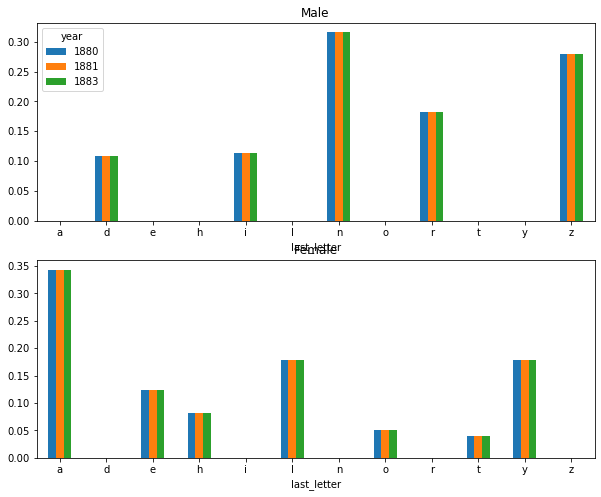

In [163]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 8))

letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female', legend=False)

As you can see, boy names ending in`n` have experienced significant growth since the 1960s. Going back to the full table created before, I again normalize by year and sex and select a subset of letters for the boy names, finally transposing to make each column a time series:

In [164]:
letter_prop = table / table.sum()

In [165]:
letter_prop

sex                 F                                                 M  \
year             1880      1881      1882      1883      1884      1880   
last_letter                                                               
a            0.343461  0.343461  0.343461  0.343461  0.327672       NaN   
d                 NaN       NaN       NaN       NaN       NaN  0.109026   
e            0.124632  0.124632  0.124632  0.124632  0.233736       NaN   
h            0.081978  0.081978  0.081978  0.081978  0.071897       NaN   
i                 NaN       NaN       NaN       NaN       NaN  0.114004   
...               ...       ...       ...       ...       ...       ...   
o            0.050884  0.050884  0.050884  0.050884  0.121868       NaN   
r                 NaN       NaN       NaN       NaN       NaN  0.181987   
t            0.040087  0.040087  0.040087  0.040087  0.045345       NaN   
y            0.179479  0.179479  0.179479  0.179479  0.076753       NaN   
z                 NaN       NaN       NaN       NaN       NaN  0.279084   

sex                                                  
year             1881      1882      1883      1884  
last_letter                                          
a                 NaN       NaN       NaN       NaN  
d            0.109026  0.109026  0.109026  0.111349  
e                 NaN       NaN       NaN       NaN  
h                 NaN       NaN       NaN       NaN  
i            0.114004  0.114004  0.114004  0.201235  
...               ...       ...       ...       ...  
o                 NaN       NaN       NaN       NaN  
r            0.181987  0.181987  0.181987  0.185864  
t                 NaN       NaN       NaN       NaN  
y                 NaN       NaN       NaN       NaN  
z            0.279084  0.279084  0.279084  0.048977  

[12 rows x 10 columns]

In [166]:
dny_ts = letter_prop.loc[['d', 'n', 'i'], 'M'].T

In [167]:
dny_ts.head()

last_letter,d,n,i
year,,,
1880,0.109026,0.315900,0.114004
1881,0.109026,0.315900,0.114004
1882,0.109026,0.315900,0.114004
1883,0.109026,0.315900,0.114004
1884,0.111349,0.452576,0.201235


I can make a plot of the trends over time again with its `plot` method 

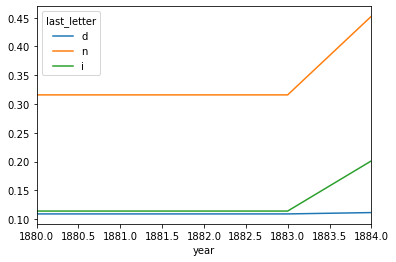

In [168]:
dny_ts.plot()

#### Boy names that became girl names (and vice versa)

Looking at boy names that were more popular with one sex earlier in the sample but have “changed sexes” in the present. 
One example is the name Lesley or Leslie. Going back to the `top1000` DataFrame, I compute a list of names occurring in the dataset starting with “lesl”:

In [169]:
all_names = pd.Series(top1000.name.unique())

In [170]:
all_names

0       Mary
1      Sahel
2       Anna
3       Sima
4       Emma
       ...  
23    Sajjad
24    Hassan
25     Mehdi
26    Hosein
27     Saeed
Length: 28, dtype: object

In [171]:
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]

In [172]:
lesley_like

Series([], dtype: object)

filter down to just those names and sum births grouped by name to see the relative frequencies:

In [173]:
filtered = top1000[top1000.name.isin(lesley_like)]

In [174]:
filtered.groupby('name').births.sum()

Series([], Name: births, dtype: int64)

Aggregate by sex and year and normalize within year:

In [175]:
table = filtered.pivot_table('births', index='year', columns='sex', aggfunc='sum')

In [176]:
table = table.div(table.sum(1), axis=0)

In [177]:
table.tail()

year


Make a plot of the breakdown by sex over time:

In [178]:
table.plot(style={'M': 'k-', 'F': 'k--'})

TypeError: no numeric data to plot

## 14.4 USDA Food Database

The US Department of Agriculture makes available a database of food nutrient information. Programmer Ashley Williams made available a version of this database in JSON format. The records look like this:

Each food has a number of identifying attributes along with two lists of `nutrients` and `portion` sizes. Data in this form is not particularly amenable to analysis, so we need to
do some work to wrangle the data into a better form.

Load it into Python

In [179]:
import json
db = json.load(open('database.json'))

In [180]:
len(db)

3

Each entry in `db` is a dict containing all the data for a single food. The 'nutrients' field is a list of dicts, one for each nutrient:

In [181]:
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [182]:
db[0]['nutrients'][0]

{'value': 20.8, 'units': 'g', 'description': 'Protein', 'group': 'Composition'}

In [183]:
nutrients = pd.DataFrame(db[0]['nutrients'])

In [184]:
nutrients

,value,units,description,group
0,20.8,g,Protein,Composition
1,213.8,mg,Carbohydrate,Composition


In [185]:
nutrients[:7]

,value,units,description,group
0,20.8,g,Protein,Composition
1,213.8,mg,Carbohydrate,Composition


When converting a list of dicts to a DataFrame, we can *specify a list of fields to extract*. We’ll take the *food names, group, ID, and manufacturer*:

In [186]:
info_keys = ['description', 'group', 'id', 'manufacturer']

In [187]:
info = pd.DataFrame(db, columns=info_keys)

In [188]:
info

,description,group,id,manufacturer
0,"KENTUCKY FRIED CHICKEN, Fried Chicken, EXTRA C...",Fast Foods,23512,Kentucky Fried Chicken
1,"KENTUCKY FRIED CHICKEN, Fried Chicken, EXTRA C...",Fast Foods,21441,Kentucky Fried Chicken
2,"KENTUCKY FRIED CHICKEN, Fried Chicken, EXTRA C...",Fast Foods,23423,Kentucky Fried Chicken


In [189]:
info[:5]

,description,group,id,manufacturer
0,"KENTUCKY FRIED CHICKEN, Fried Chicken, EXTRA C...",Fast Foods,23512,Kentucky Fried Chicken
1,"KENTUCKY FRIED CHICKEN, Fried Chicken, EXTRA C...",Fast Foods,21441,Kentucky Fried Chicken
2,"KENTUCKY FRIED CHICKEN, Fried Chicken, EXTRA C...",Fast Foods,23423,Kentucky Fried Chicken


In [190]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
description     3 non-null object
group           3 non-null object
id              3 non-null int64
manufacturer    3 non-null object
dtypes: int64(1), object(3)
memory usage: 224.0+ bytes


See the distribution of food groups with `value_counts`:

In [191]:
pd.value_counts(info.group)[:10]

Fast Foods    3
Name: group, dtype: int64

To **do some analysis on all of the nutrient data**, it’s easiest to *assemble the nutrients for each food into a single large table*. 

To do so, we need to take several steps: 

First, I’ll convert each list of food nutrients to a DataFrame, add a column for the food id, and append the DataFrame to a list. 

Then, these can be concatenated together with `concat`:

In [192]:
pieces = []
for food in db:
    frame = pd.DataFrame(food['nutrients'])
    
    frame['id'] = food['id']
    pieces.append(frame)

# Concatenate everything into a single DataFrame
nutrients = pd.concat(pieces, ignore_index=True)

In [193]:
nutrients

,value,units,description,group,id
0,20.8,g,Protein,Composition,23512
1,213.8,mg,Carbohydrate,Composition,23512
2,20.8,g,Protein,Composition,21441
3,213.8,mg,Carbohydrate,Composition,21441
4,20.8,g,Protein,Composition,23423
5,213.8,mg,Carbohydrate,Composition,23423


If all goes well, `nutrients` should look like this:

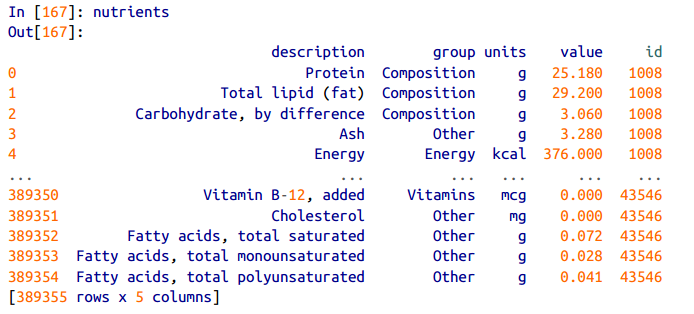

Notice that there are duplicates in this DataFrame, so it makes things easier to drop them:

In [194]:
nutrients.duplicated().sum() # number of duplicates

0

Since 'group' and 'description' are in both DataFrame objects, we can rename for clarity:

In [195]:
col_mapping = {'description' : 'food', 'group' : 'fgroup'}

In [196]:
info = info.rename(columns=col_mapping, copy=False)

In [197]:
col_mapping = {'description' : 'nutrient', 'group' : 'nutgroup'}

In [198]:
nutrients = nutrients.rename(columns=col_mapping, copy=False)

In [199]:
nutrients

,value,units,nutrient,nutgroup,id
0,20.8,g,Protein,Composition,23512
1,213.8,mg,Carbohydrate,Composition,23512
2,20.8,g,Protein,Composition,21441
3,213.8,mg,Carbohydrate,Composition,21441
4,20.8,g,Protein,Composition,23423
5,213.8,mg,Carbohydrate,Composition,23423


In [200]:
nutrients = nutrients.drop_duplicates()

In [201]:
nutrients

,value,units,nutrient,nutgroup,id
0,20.8,g,Protein,Composition,23512
1,213.8,mg,Carbohydrate,Composition,23512
2,20.8,g,Protein,Composition,21441
3,213.8,mg,Carbohydrate,Composition,21441
4,20.8,g,Protein,Composition,23423
5,213.8,mg,Carbohydrate,Composition,23423


With all of this done, we’re ready to merge `info` with `nutrients`:

In [202]:
ndata = pd.merge(nutrients, info, on='id', how='outer')

In [203]:
ndata

,value,units,nutrient,nutgroup,id,food,fgroup,manufacturer
0,20.8,g,Protein,Composition,23512,"KENTUCKY FRIED CHICKEN, Fried Chicken, EXTRA C...",Fast Foods,Kentucky Fried Chicken
1,213.8,mg,Carbohydrate,Composition,23512,"KENTUCKY FRIED CHICKEN, Fried Chicken, EXTRA C...",Fast Foods,Kentucky Fried Chicken
2,20.8,g,Protein,Composition,21441,"KENTUCKY FRIED CHICKEN, Fried Chicken, EXTRA C...",Fast Foods,Kentucky Fried Chicken
3,213.8,mg,Carbohydrate,Composition,21441,"KENTUCKY FRIED CHICKEN, Fried Chicken, EXTRA C...",Fast Foods,Kentucky Fried Chicken
4,20.8,g,Protein,Composition,23423,"KENTUCKY FRIED CHICKEN, Fried Chicken, EXTRA C...",Fast Foods,Kentucky Fried Chicken
5,213.8,mg,Carbohydrate,Composition,23423,"KENTUCKY FRIED CHICKEN, Fried Chicken, EXTRA C...",Fast Foods,Kentucky Fried Chicken


In [204]:
ndata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 0 to 5
Data columns (total 8 columns):
value           6 non-null float64
units           6 non-null object
nutrient        6 non-null object
nutgroup        6 non-null object
id              6 non-null int64
food            6 non-null object
fgroup          6 non-null object
manufacturer    6 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 432.0+ bytes


In [205]:
ndata.iloc[2]

value                                                        20.8
units                                                           g
nutrient                                                  Protein
nutgroup                                              Composition
id                                                          21441
food            KENTUCKY FRIED CHICKEN, Fried Chicken, EXTRA C...
fgroup                                                 Fast Foods
manufacturer                               Kentucky Fried Chicken
Name: 2, dtype: object

make a plot of median values by food group and nutrient type

In [206]:
result = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5)

In [207]:
result

nutrient      fgroup    
Carbohydrate  Fast Foods    213.8
Protein       Fast Foods     20.8
Name: value, dtype: float64

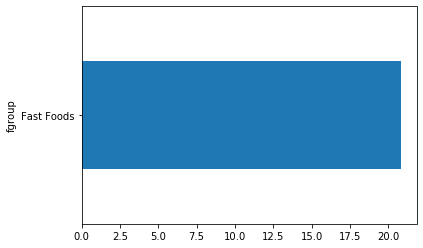

In [208]:
# result['Zinc, Zn'].sort_values().plot(kind='barh')
result['Protein'].sort_values().plot(kind='barh')

In [209]:
ndata.head()

,value,units,nutrient,nutgroup,id,food,fgroup,manufacturer
0,20.8,g,Protein,Composition,23512,"KENTUCKY FRIED CHICKEN, Fried Chicken, EXTRA C...",Fast Foods,Kentucky Fried Chicken
1,213.8,mg,Carbohydrate,Composition,23512,"KENTUCKY FRIED CHICKEN, Fried Chicken, EXTRA C...",Fast Foods,Kentucky Fried Chicken
2,20.8,g,Protein,Composition,21441,"KENTUCKY FRIED CHICKEN, Fried Chicken, EXTRA C...",Fast Foods,Kentucky Fried Chicken
3,213.8,mg,Carbohydrate,Composition,21441,"KENTUCKY FRIED CHICKEN, Fried Chicken, EXTRA C...",Fast Foods,Kentucky Fried Chicken
4,20.8,g,Protein,Composition,23423,"KENTUCKY FRIED CHICKEN, Fried Chicken, EXTRA C...",Fast Foods,Kentucky Fried Chicken


You can find which food is most dense in each nutrient:

In [210]:
by_nutrient = ndata.groupby(['nutgroup', 'nutrient'])

get_maximum = lambda x: x.loc[x.value.idxmax()]
get_minimum = lambda x: x.loc[x.value.idxmin()]

In [211]:
max_foods = by_nutrient.apply(get_maximum)[['value', 'food']]

In [212]:
max_foods

value  \
nutgroup    nutrient              
Composition Carbohydrate  213.8   
            Protein        20.8   

                                                                       food  
nutgroup    nutrient                                                         
Composition Carbohydrate  KENTUCKY FRIED CHICKEN, Fried Chicken, EXTRA C...  
            Protein       KENTUCKY FRIED CHICKEN, Fried Chicken, EXTRA C...

In [213]:
# make the food a little smaller
max_foods.food = max_foods.food.str[:50]

In [214]:
max_foods

value  \
nutgroup    nutrient              
Composition Carbohydrate  213.8   
            Protein        20.8   

                                                                       food  
nutgroup    nutrient                                                         
Composition Carbohydrate  KENTUCKY FRIED CHICKEN, Fried Chicken, EXTRA C...  
            Protein       KENTUCKY FRIED CHICKEN, Fried Chicken, EXTRA C...

In [215]:
# max_foods.loc['Amino Acids']['food']

### 14.5 2012 Federal Election Commission Database

The US Federal Election Commission publishes data on contributions to political campaigns. This includes *contributor names, occupation and employer, address, and contribution amount*. 

A version of the dataset I downloaded in June 2012 is a 150 megabyte CSV file `P00000001-ALL.csv`, which can be loaded with `pandas.read_csv`:

In [216]:
fec = pd.read_csv('P00000001-ALL.csv')

FileNotFoundError: [Errno 2] File b'P00000001-ALL.csv' does not exist: b'P00000001-ALL.csv'

In [ ]:
fec.info()

In [ ]:
fec.iloc[123456]

You can see that there are no political party affiliations in the data, so this would be useful to add. You can get a list of all the unique political candidates using `unique`:

In [ ]:
unique_cands = fec.cand_nm.unique()

In [ ]:
unique_cands

One way to indicate party affiliation is using a dict:

In [ ]:
parties = {'Bachmann, Michelle': 'Republican',
'Cain, Herman': 'Republican',
'Gingrich, Newt': 'Republican',
'Huntsman, Jon': 'Republican',
'Johnson, Gary Earl': 'Republican',
'McCotter, Thaddeus G': 'Republican',
'Obama, Barack': 'Democrat',
'Paul, Ron': 'Republican',
'Pawlenty, Timothy': 'Republican',
'Perry, Rick': 'Republican',
"Roemer, Charles E. 'Buddy' III": 'Republican',
'Romney, Mitt': 'Republican',
'Santorum, Rick': 'Republican'}

Using this mapping and the `map` method on Series objects, you can compute an array of political parties from the candidate names:

In [ ]:
 fec.cand_nm[123456:123461]

In [ ]:
fec.cand_nm[123456:123461]

In [ ]:
fec['party'] = fec.cand_nm.map(parties)

In [ ]:
fec['party'].value_counts()

A couple of data preparation points. First, this data includes both contributions and refunds (negative contribution amount):

In [ ]:
(fec.contb_receipt_amt > 0).value_counts()

To simplify the analysis, I’ll restrict the dataset to positive contributions:

In [ ]:
fec = fec[fec.contb_receipt_amt > 0]

Since Barack Obama and Mitt Romney were the main two candidates, I’ll also prepare a subset that just has contributions to their campaigns:

In [ ]:
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])]

#### Donation Statistics by Occupation and Employer

Donations by occupation is another oft-studied statistic. For example, lawyers (attorneys) tend to donate more money to Democrats, while business executives tend to donate more to Republicans. 
you can see for yourself in the data. 

First, the total number of donations by occupation is easy:

In [ ]:
fec.contbr_occupation.value_counts()[:10]

You will notice by looking at the occupations that many refer to the same basic job type, or there are several variants of the same thing. The following code snippet illustrates a technique for cleaning up a few of them by mapping from one occupation to another; note the “trick” of using `dict.get` to allow occupations with no mapping to “pass through”:

In [ ]:
occ_mapping = {
'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
'INFORMATION REQUESTED' : 'NOT PROVIDED',
'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',
'C.E.O.': 'CEO'
}

In [ ]:
# If no mapping provided, return x
f = lambda x: occ_mapping.get(x, x)
fec.contbr_occupation = fec.contbr_occupation.map(f)

I’ll also do the same thing for employers:

In [ ]:
emp_mapping = {
'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
'INFORMATION REQUESTED' : 'NOT PROVIDED',
'SELF' : 'SELF-EMPLOYED',
'SELF EMPLOYED' : 'SELF-EMPLOYED',
}

In [ ]:
emp_mapping = {
'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
'INFORMATION REQUESTED' : 'NOT PROVIDED',
'SELF' : 'SELF-EMPLOYED',
'SELF EMPLOYED' : 'SELF-EMPLOYED',
}

use pivot_table to aggregate the data by party and occupation, then filter down to the subset that donated at least $2 million overall:

In [ ]:
by_occupation = fec.pivot_table('contb_receipt_amt',
index='contbr_occupation',
columns='party', aggfunc='sum')

In [ ]:
over_2mm = by_occupation[by_occupation.sum(1) > 2000000]

In [ ]:
over_2mm = by_occupation[by_occupation.sum(1) > 2000000]

You might be interested in the top donor occupations or top companies that donated to Obama and Romney. To do this, you can group by candidate name and use a variant of the `top` method from earlier in the chapter:

In [ ]:
def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    return totals.nlargest(n)

Then aggregate by occupation and employer:

In [ ]:
grouped = fec_mrbo.groupby('cand_nm')

In [ ]:
grouped.apply(get_top_amounts, 'contbr_occupation', n=7)

In [ ]:
grouped.apply(get_top_amounts, 'contbr_employer', n=10)

### Bucketing Donation Amounts

A useful way to analyze this data is to use the `cut` function to discretize the contributor amounts into buckets by contribution size:

In [ ]:
bins = np.array([0, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000])

In [ ]:
labels = pd.cut(fec_mrbo.contb_receipt_amt, bins)

In [ ]:
labels

We can then group the data for Obama and Romney by name and bin label to get a histogram by donation size:

In [ ]:
grouped = fec_mrbo.groupby(['cand_nm', labels])

In [ ]:
grouped.size().unstack(0)

This data shows that Obama received a significantly larger number of small donations than Romney. 

You can also sum the contribution amounts and normalize within buckets to visualize percentage of total donations of each size by candidate:

In [ ]:
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)

In [ ]:
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1), axis=0)

In [ ]:
normed_sums

In [ ]:
# I excluded the two largest bins as these are not donations by individuals.
normed_sums[:-2].plot(kind='barh')

You could aggregate donations by donor name and zip code to adjust for donors who gave many small amounts versus one or more large donations. 

#### Donation Statistics by State

Aggregating the data by candidate and state is a routine affair:

In [ ]:
grouped = fec_mrbo.groupby(['cand_nm', 'contbr_st'])
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)
totals = totals[totals.sum(1) > 100000]
totals[:10]

If you divide each row by the total contribution amount, you get the relative percentage of total donations by state for each candidate:

In [ ]:
percent = totals.div(totals.sum(1), axis=0)

In [ ]:
percent[:10]